# CNN을 이용하여 cifar10 데이터셋 분류하기

keyword: CNN, convolution, pooling, vgg16, resnet50, pretrained model, transfer learning, fine tunning

- key word에 대해서 이해하고, 숙지할것

- 1. mnist dataset에서 쌓은 경험으로, 자유롭게 모델링 할것
- 2. vggnetwork를 불러와서 (img size 244,244로 해야함) 새로운 layer를 추가하고, 기존의 모델은 freeze해서 추가학습을 진행할것

- 3. 본인의 방법과 vggnet의 결과를 비교하며, 최대한 성능을 비슷하게 여러방법을 사용해서 자신이 모델링한것들을 수정해볼것.


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torchvision import models

In [4]:
transform = transforms.Compose([
    transforms.Resize((244, 244)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

100.0%


In [5]:

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [6]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


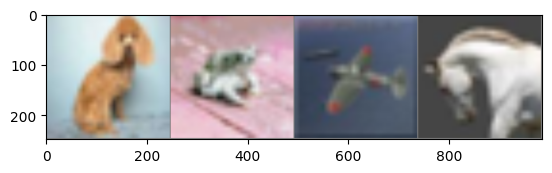

dog   frog  plane horse


In [7]:
# 실행할수록 출력되는 이미지 달라지니, 여러번 실행해서 확인해보자
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

# your code here

In [ ]:
# 내 모델 정의
class NeuralNetDeep(nn.Module):
    def __init__(self):
        super(NeuralNetDeep, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 192)  # 128 → 192
        self.fc2 = nn.Linear(192, 128)  # 추가된 레이어
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [ ]:
# VGGNet 모델 불러오기
class VGG16Model(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16Model, self).__init__()
        self.vgg16 = models.vgg16(pretrained=True)  # 사전 훈련된 VGG16 모델 로드
        self.vgg16.classifier[6] = nn.Linear(self.vgg16.classifier[6].in_features, num_classes)  # 분류기 레이어 수정

    def forward(self, x):
        return self.vgg16(x)


In [ ]:
# 새로운 분류기 레이어를 VGGNet 끝단에 추가

num_classes = 10
vgg16.classifier[6] = nn.Linear(vgg16.classifier[6].in_features, num_classes)

In [ ]:
# 손실함수, optimizer 등등 정의


optimizers = {
    "SGD": lambda model: optim.SGD(model.parameters(), lr=0.01, momentum=0.9),
    "Adam": lambda model: optim.Adam(model.parameters(), lr=0.001)
}


criterion = nn.CrossEntropyLoss()  # 크로스 엔트로피 손실 함수


In [ ]:
# 학습 (나의 모델, vgg 모델 둘다 학습할것)

num_epochs = 10

def train_model(model, optimizer, train_loader, criterion, num_epochs=10):
    model.to(device)
    train_losses = []
    train_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        avg_loss = running_loss / len(train_loader)
        accuracy = 100 * correct / total
        train_losses.append(avg_loss)
        train_accuracies.append(accuracy)

        print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, Accuracy = {accuracy:.2f}%")

    return train_losses, train_accuracies

def evaluate_model(model, test_loader, criterion):
    model.to(device)
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    avg_loss = total_loss / len(test_loader)
    accuracy = 100 * correct / total
    print(f"Test Loss = {avg_loss:.4f}, Test Accuracy = {accuracy:.2f}%")

    return avg_loss, accuracy

In [ ]:
# 본인의 모델과 vggnet의 결과를 비교

